# Problem Statement

The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R and achieve the following goals: 

Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized.<br/>
Present the financial benefit of this project to the marketing team.

# Data

Abstact: The data is related with the direct-marketing campaigns(phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term of deposit(variable y). 

In [2]:
import  pandas  as  pd                 # For data manipulation and analysis
import  numpy as  np                   # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs

In [3]:
data = pd.read_csv(r'C:\Users\Amit Tiwari\Downloads\bank-additional\bank-additional-full.csv',sep=';')

In [4]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
from sklearn.feature_extraction import DictVectorizer

In [8]:
num_variables = ["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
cat_variables = [i for i in data.columns if i not in num_variables]
cat_variables.remove("y")
Label = "y"

<b>Plotting box plot to anlayse the distribution of different numerical attributes</b>

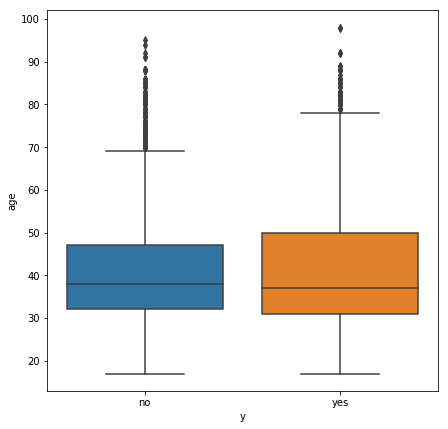

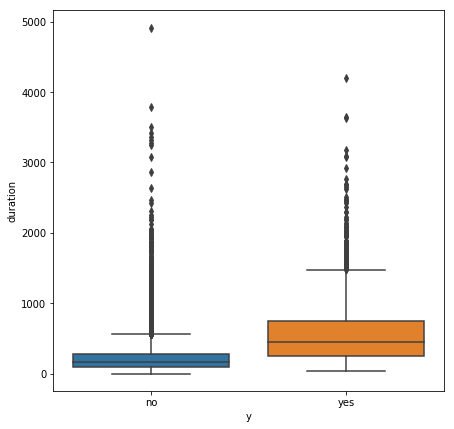

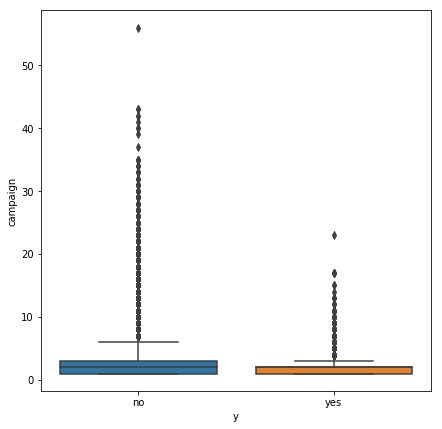

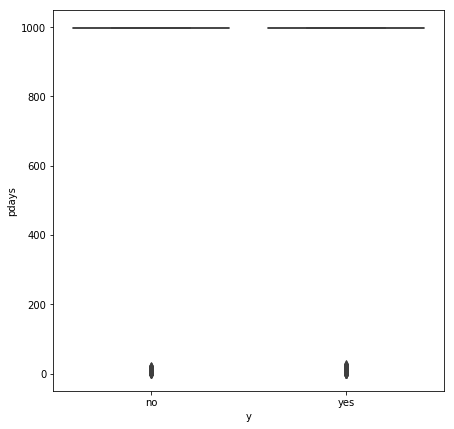

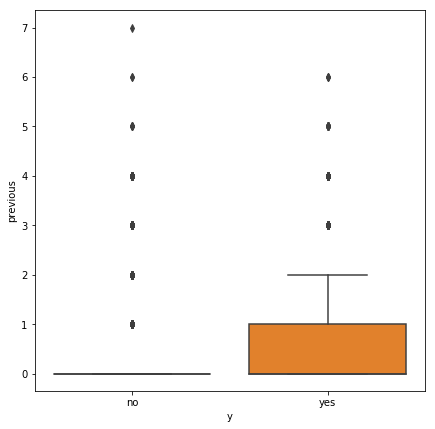

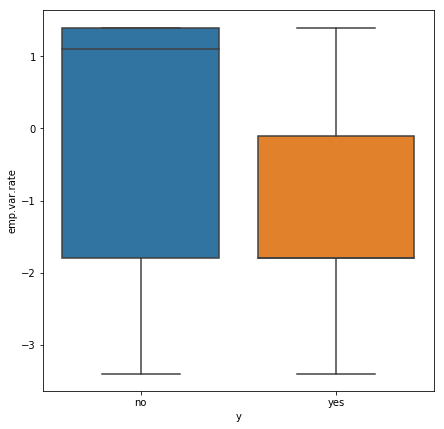

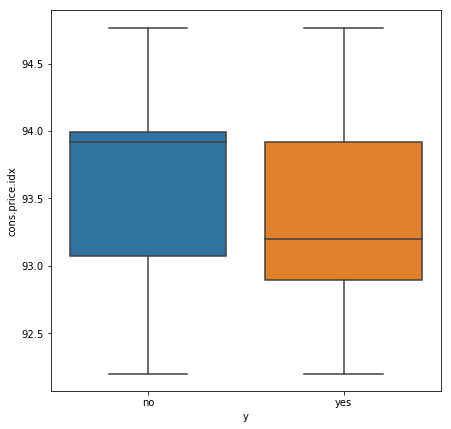

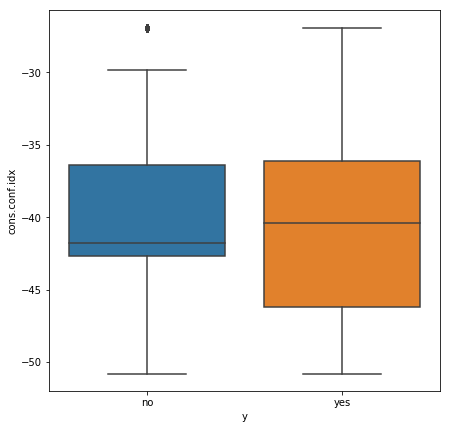

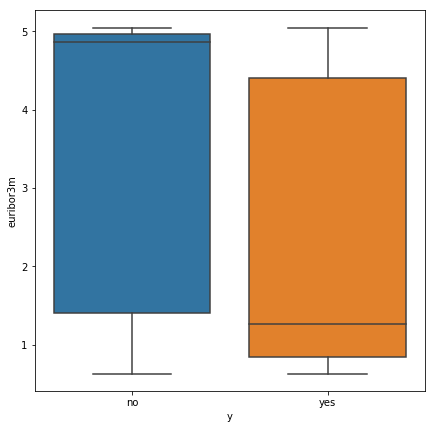

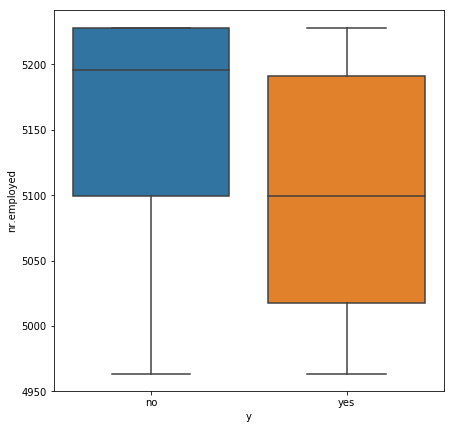

In [9]:
for i in num_variables:
    plt.figure(figsize=(7,7))
    sns.boxplot(x=Label,y=i,data=data)
    plt.show()

<b>Plotting bar plot to analyse the distribution of categorical attributes</b>

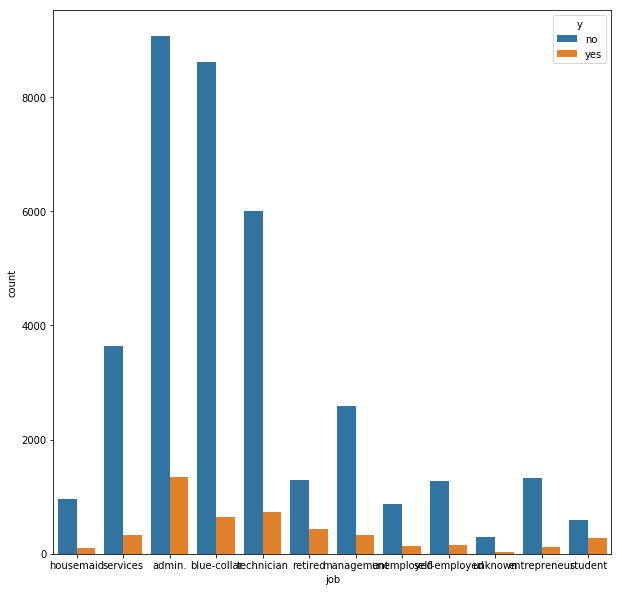

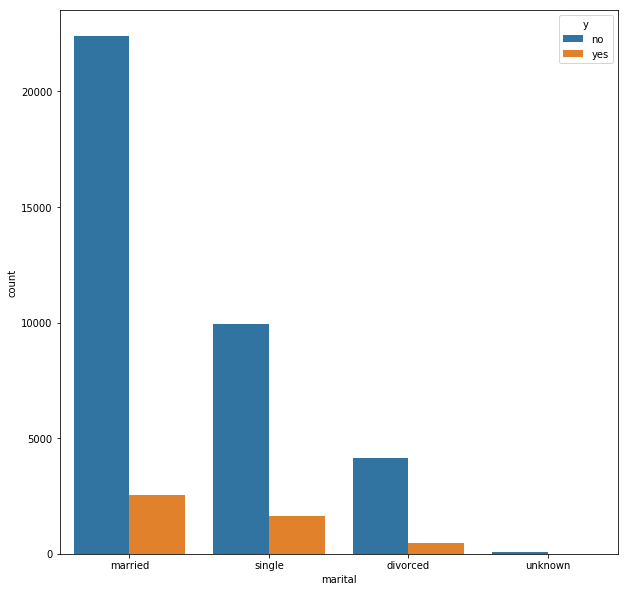

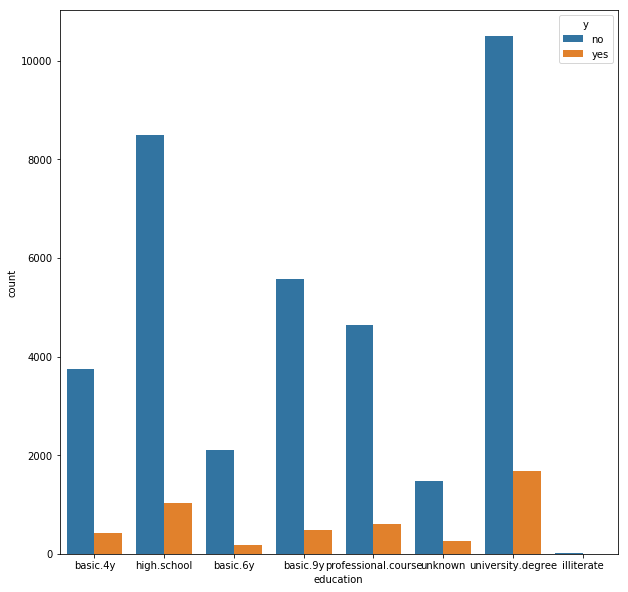

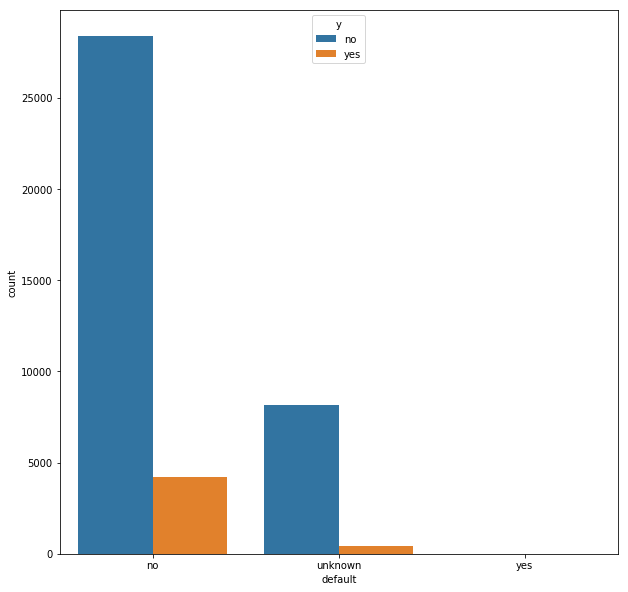

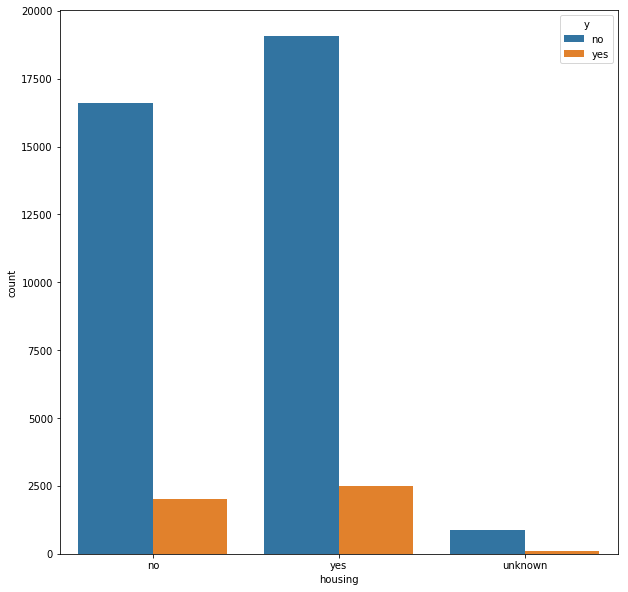

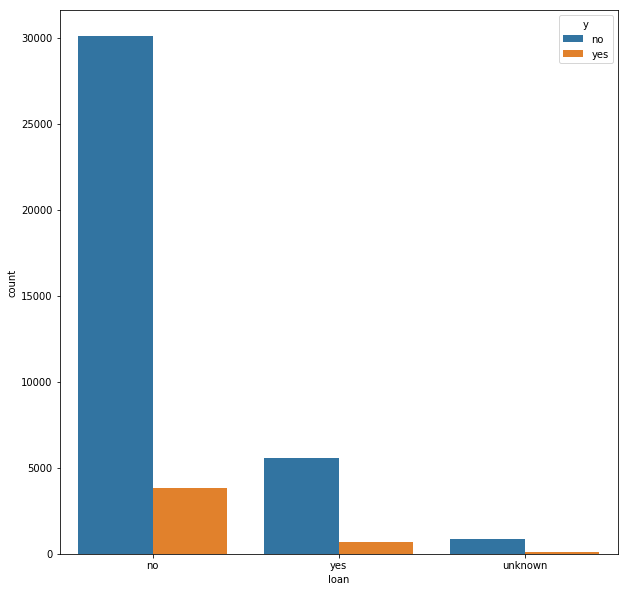

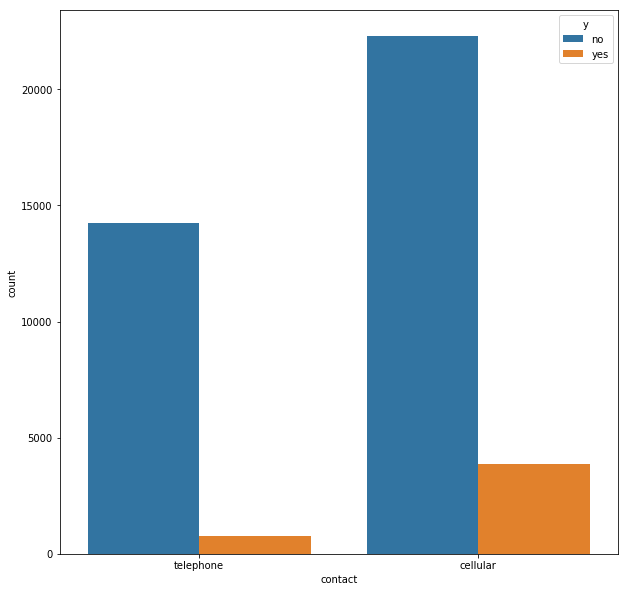

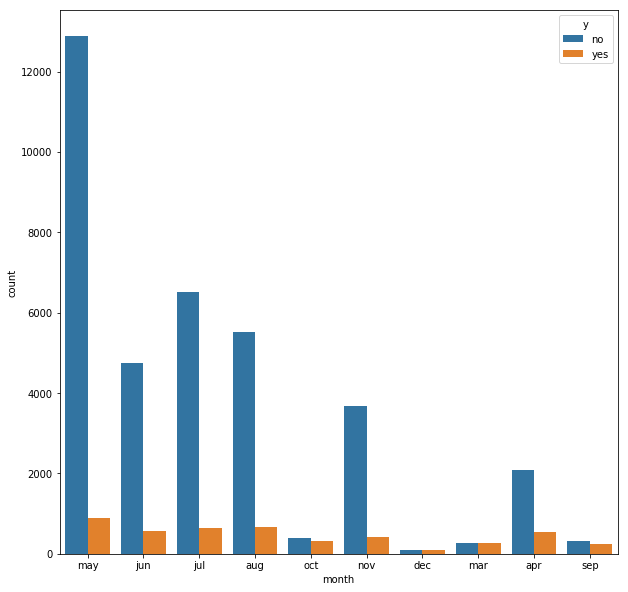

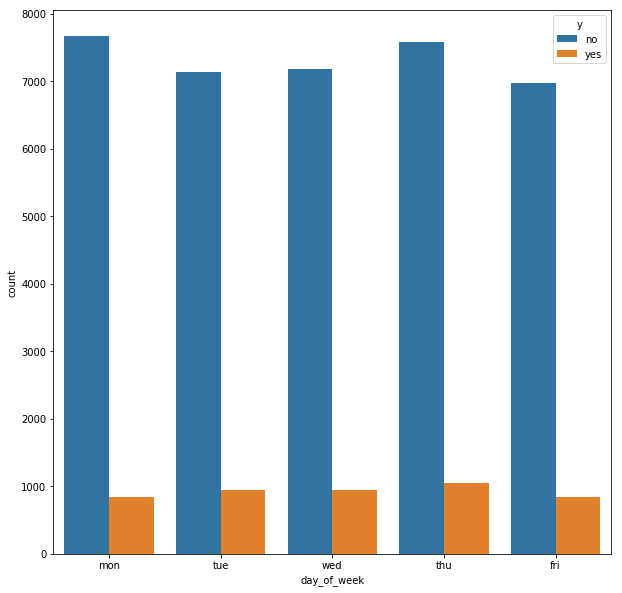

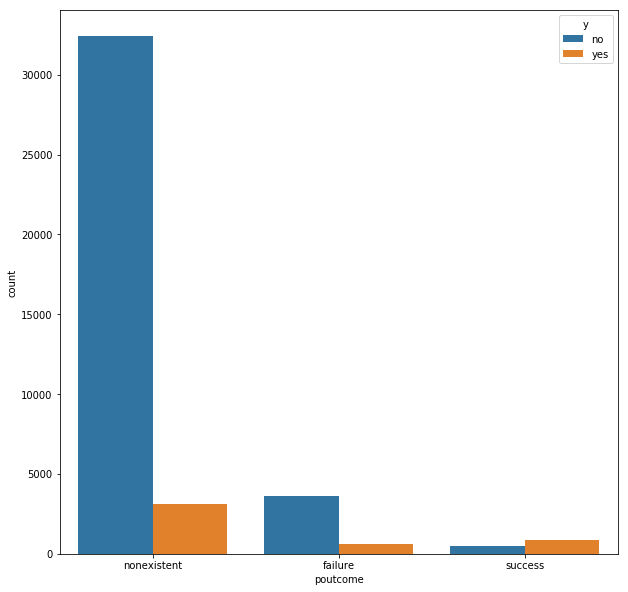

In [10]:
for i in cat_variables:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, hue=Label, data=data)
    plt.show()

# Binary Classification:

Binary or binomial classification is the task of classifying the elements of a given set into two groups (predicting which group each one belongs to) on the basis of a classification rule. Contexts requiring a decision as to whether or not an item has some qualitative property, some specified characteristic, or some typical binary classification include:<br>
Medical testing to determine if a patient has certain disease or not – the classification property is the presence of the disease. <br> A "pass or fail" test method or quality control in factories.

In [11]:
y = data['y']

In [12]:
y = y.replace(['yes','no'],(1,0))

In [13]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['job','marital','default','education','housing','loan','contact','month','poutcome']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

In [14]:
data = encode_features(data)

In [15]:
X = data.drop(['y'], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

# RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.datasets import make_classification
import numpy as np

<b>Random Forest by dropping categorical variable as they don't gives significant information about the prospect decsion. So we can remove them from our data and Numerical variable pdays could also be removed as it has all the values similar.</b>

In [25]:
Data=data

In [26]:
Data=Data.drop(cat_variables,axis=1)

In [27]:
num_variables.remove("pdays")

In [28]:
data_dict = Data.T.to_dict().values()

In [29]:
vec = DictVectorizer()
conv_to_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()

In [30]:
Data = pd.DataFrame(conv_to_array,columns=feature_names)
Data.head()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,261.0,1.1,4.857,5191.0,999.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,149.0,1.1,4.857,5191.0,999.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,226.0,1.1,4.857,5191.0,999.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,151.0,1.1,4.857,5191.0,999.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,307.0,1.1,4.857,5191.0,999.0,0.0,1.0,0.0


In [31]:
X = conv_to_array[:,:-2]
X = np.hstack((X[:,:7],X[:,8:]))
y = conv_to_array[:,-1]
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking 
print("Feature ranking:")

for i in range(X.shape[1]):
    print("%d. feature :%s (%f)" % (i + 1, feature_names[indices[i]], importances[indices[i]]))

Feature ranking:
1. feature :duration (0.414821)
2. feature :euribor3m (0.197721)
3. feature :age (0.152610)
4. feature :campaign (0.057292)
5. feature :nr.employed (0.056017)
6. feature :cons.conf.idx (0.038832)
7. feature :emp.var.rate (0.033840)
8. feature :cons.price.idx (0.028821)
9. feature :pdays (0.020046)


<i><b>Plotting regression plots for different attributes</b></i>

C:\Users\Amit Tiwari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


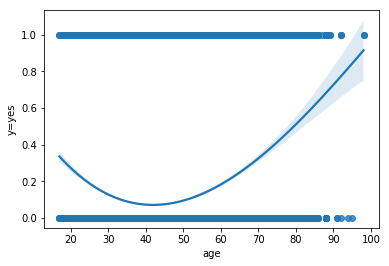

In [32]:
ax = sns.regplot(x="age", y="y=yes", order=3, data=Data, truncate=True)

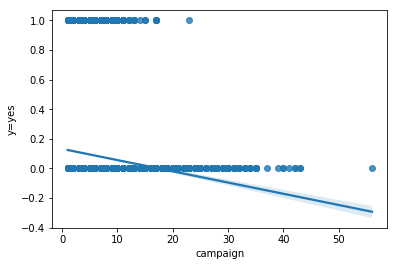

In [33]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=Data, truncate=True)

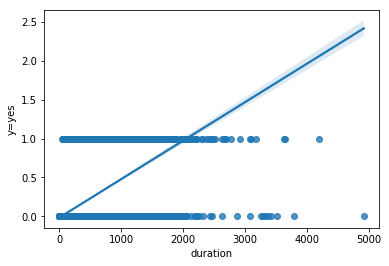

In [34]:
ax = sns.regplot(x="duration", y="y=yes", order=1, data=Data, truncate=True)

In [35]:
sum(Data['y=yes'])/sum(Data['campaign'])

0.043875408967982296

<b>Optimization using compaign</b>

In [36]:
# Total Conversion ratio
sum(Data['y=yes'])/sum(Data['campaign'])

0.043875408967982296

<i><b>Efficiency on each additional call</b></i>

In [37]:
print("Nth Call \t Conversion ratio")
for i in range(1,30):
    eff = sum(Data.loc[Data['campaign']==i]['y=yes']) / float(Data.loc[Data['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(eff))

Nth Call 	 Conversion ratio
1 		 0.05584150723511702
2 		 0.05143124097511254
3 		 0.04423551171393342
4 		 0.03261296660117878
5 		 0.024077046548956663
6 		 0.022156573116691284
7 		 0.015793848711554447
8 		 0.009566685424873381
9 		 0.012345679012345678
10 		 0.010968921389396709
11 		 0.01380897583429229
12 		 0.004335260115606936
13 		 0.007054673721340388
14 		 0.002105263157894737
15 		 0.0049261083743842365
16 		 0.0
17 		 0.013157894736842105
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.008620689655172414
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


<b>The market acceptable conversion ratio ranges from 2-10% and from above we can see that after 10th call the ratio is around 1.5%. So the calls after 6th call are not acceptable</b>

In [38]:
print("For age upto 30")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] <= 30) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = 1+float(Data[(Data['age'] <= 30) & (Data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age upto 30
Nth Call 	 Conversion ratio
1 		 0.07502708559046588
2 		 0.07100309745055992
3 		 0.06274509803921569
4 		 0.04447739065974796
5 		 0.03882352941176471
6 		 0.02058319039451115
7 		 0.030805687203791468
8 		 0.006493506493506494
9 		 0.012875536480686695
10 		 0.005376344086021506
11 		 0.013888888888888888
12 		 0.0
13 		 0.010869565217391304
14 		 0.0
15 		 0.014705882352941176
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [39]:
print("For age between 30-40")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] <= 40) & (Data['age'] > 30) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = 1+float(Data[(Data['age'] <= 40) & (Data['age'] > 30) & (Data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 30-40
Nth Call 	 Conversion ratio
1 		 0.04882216526302942
2 		 0.042643923240938165
3 		 0.04005444293214078
4 		 0.028093645484949834
5 		 0.02048131080389145
6 		 0.024279210925644917
7 		 0.007494646680942184
8 		 0.008746355685131196
9 		 0.011538461538461539
10 		 0.011990407673860911
11 		 0.015015015015015015
12 		 0.0076045627376425855
13 		 0.009523809523809525
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.009259259259259259
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.02040816326530612
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [40]:
print("For age between 40-50")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] <= 50) & (Data['age'] > 40) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = 1+float(Data[(Data['age'] <= 50) & (Data['age'] > 40) & (Data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 40-50
Nth Call 	 Conversion ratio
1 		 0.03925397910360316
2 		 0.036345108695652176
3 		 0.03047676523838262
4 		 0.027820710973724884
5 		 0.020737327188940093
6 		 0.016853932584269662
7 		 0.008012820512820512
8 		 0.008368200836820083
9 		 0.005333333333333333
10 		 0.013888888888888888
11 		 0.017316017316017316
12 		 0.005434782608695652
13 		 0.006622516556291391
14 		 0.007936507936507936
15 		 0.0
16 		 0.0
17 		 0.023529411764705882
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [41]:
print("For age between 50-60")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] <= 60) & (Data['age'] > 50) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = 1+float(Data[(Data['age'] <= 60) & (Data['age'] > 50) & (Data['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 50-60
Nth Call 	 Conversion ratio
1 		 0.050709615691277306
2 		 0.05120481927710843
3 		 0.040806293018682396
4 		 0.024681528662420384
5 		 0.016766467065868262
6 		 0.02120141342756184
7 		 0.022004889975550123
8 		 0.013559322033898305
9 		 0.024489795918367346
10 		 0.009900990099009901
11 		 0.0
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.011363636363636364
16 		 0.0
17 		 0.016129032258064516
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [42]:
print("For age above 60")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(Data[(Data['age'] > 60) & (Data['campaign']==i) & (Data['y=yes']==1)].shape[0])
    den = float(Data[(Data['age'] > 60) & (Data['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

For age above 60
Nth Call 	 Conversion ratio
1 		 0.24807903402854006
2 		 0.25806451612903225
3 		 0.20512820512820512
4 		 0.19230769230769232
5 		 0.12244897959183673
6 		 0.12121212121212122
7 		 0.18181818181818182
8 		 0.06666666666666667
9 		 0.0
10 		 0.0
11 		 0.16666666666666666
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


<b>Age groups do not show any remarkable patterns compared to the numbers over all ages<b>

In [43]:
# total calls made
total_calls = sum(Data['campaign'])
print(total_calls)

105754.0


In [44]:
# total calls made after 6th call
extra_calls = sum(Data[Data['campaign']>6]['campaign']) - 6*Data[Data['campaign']>6].shape[0]
print(extra_calls)

12040.0


In [46]:
#market cost reduction
reduction=100*extra_calls/total_calls
print(reduction)

11.384912154622993


In [47]:
total_sales=float(Data[Data['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [48]:
less_costly_sales=float(Data[(Data['campaign'] <= 6) & (Data['y=yes']==1)].shape[0])
print(less_costly_sales)

4529.0


In [49]:
#Prospects acquired
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.60775862068965


<b>Best Accuracy is obtained by Random Forest</b>

# Result

<b>With the 11.38% reduction in market 97.6% sales can be maintained if any person is called maximum of 10 times</b>